# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.patches as mpatches

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [3]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :

## ScatterPlot with 2 variables, title and legend
First of all, you have to create a scatterplot with MAX (in red) and MIN (in blue) Temperatures on the same graph

X-axis stay "DATE" for both values

You have to add title and legend

Here is an example of what is expected :

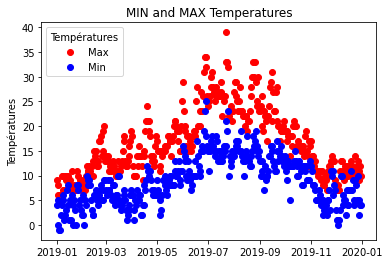

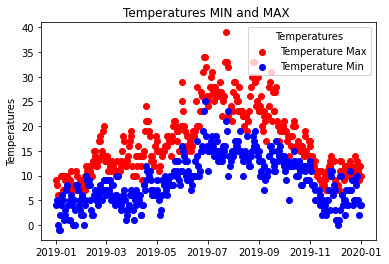

In [4]:
# Complete the code below :

plt.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red', label = 'Temperature Max') 

#You have to complete this code. You could probably try to copy the previous line, and change max temperature by min temperature ?
plt.scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue', label = 'Temperature Min') 
plt.legend(loc = 'upper right', title = 'Temperatures') #legende tu scatter reprenant automatiquement les 2 données saisi, le loc sert a placé la légende dans le graph et le title à choisir le titre de la légende
plt.title('Temperatures MIN and MAX ') #Titre du graph
plt.ylabel('Temperatures')# à demander
plt.show()




## 2 charts on the same figure
Now, complete this code to have MAX and MIN Temperature in 2 charts, MAX on the left side and MIN on the right side 

The X axis have to be the date of the year

Each graph must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

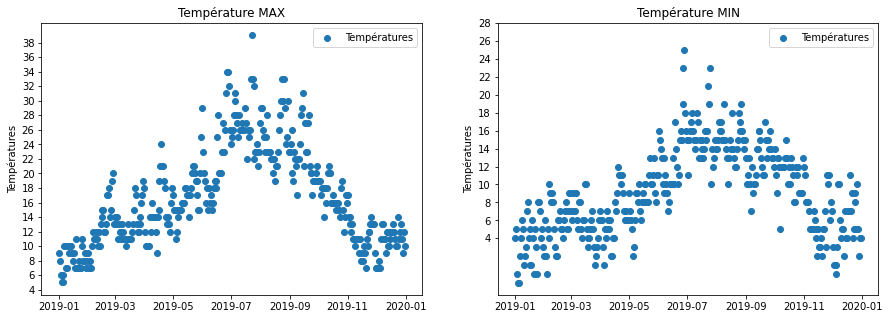

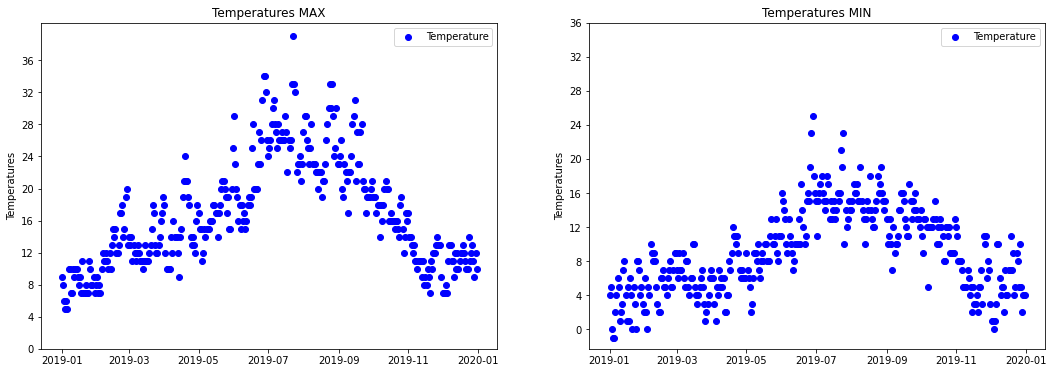

In [ ]:
# Complete the code below

fig, ax = plt.subplots(figsize = (18,6))
ax1 = plt.subplot(121) # 211 ? What does it mean ? "2" for 2 lines, "1" for 1 column and "1" for the first chart, you can change it
ax1.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'blue',label = 'Temperature')
ax1.legend(loc = 'upper right')
ax1.yaxis.set_ticks(range(0,40,4)) 
plt.ylabel('Temperatures')
plt.title('Temperatures MAX')

ax2 = plt.subplot(122)
ax2.scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue', label = 'Temperature')
ax2.legend(loc = 'upper right')
ax2.yaxis.set_ticks(range(0,40,4)) #Hey, look at this ! I just modified the scale and the ticks with only one line !
plt.ylabel('Temperatures')
plt.title('Temperatures MIN')

plt.show()

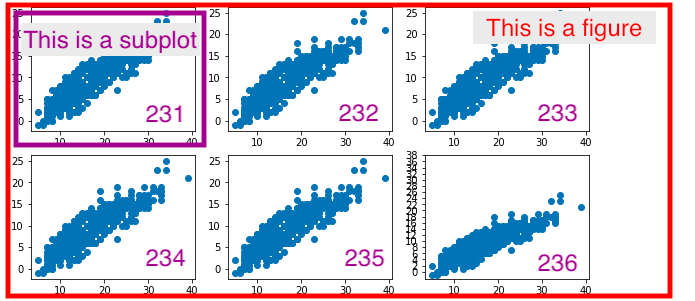

## and 4 charts now !
Now, you have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : a pie-chart with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : an histogram of MAX Temperature

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

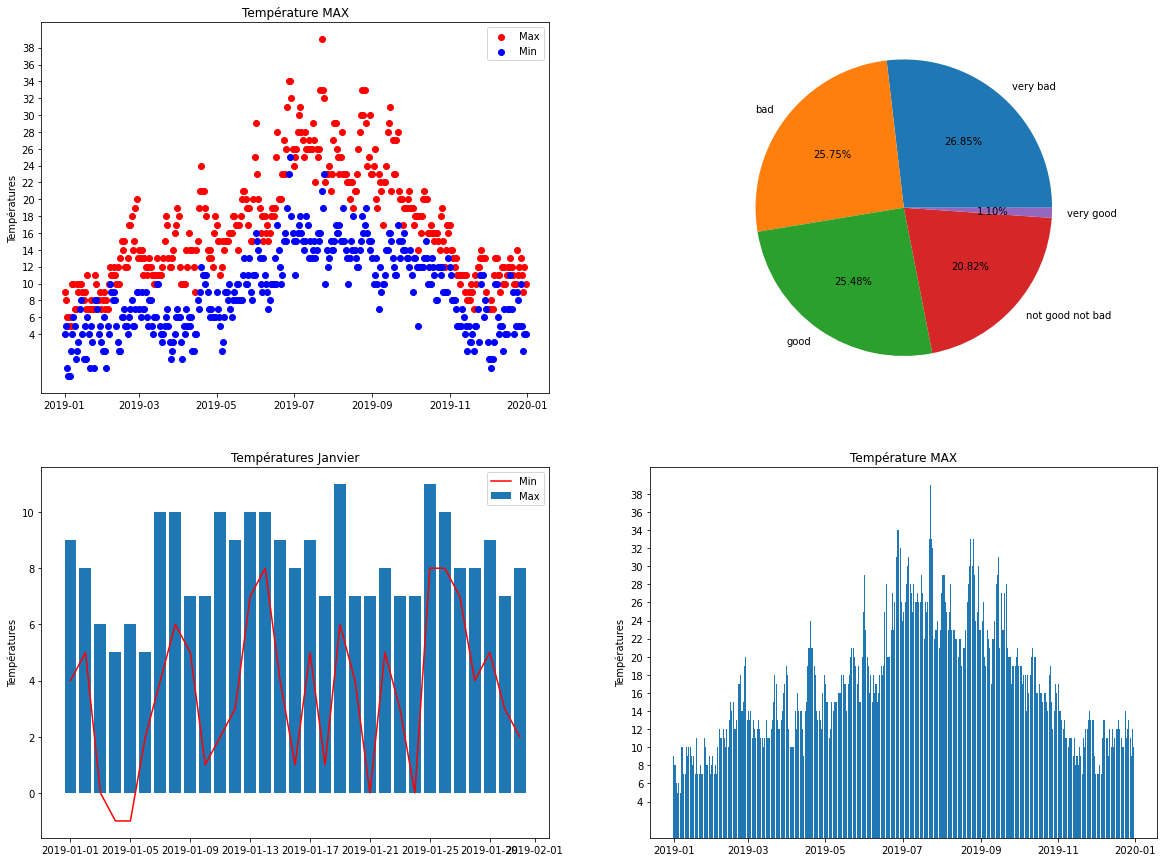

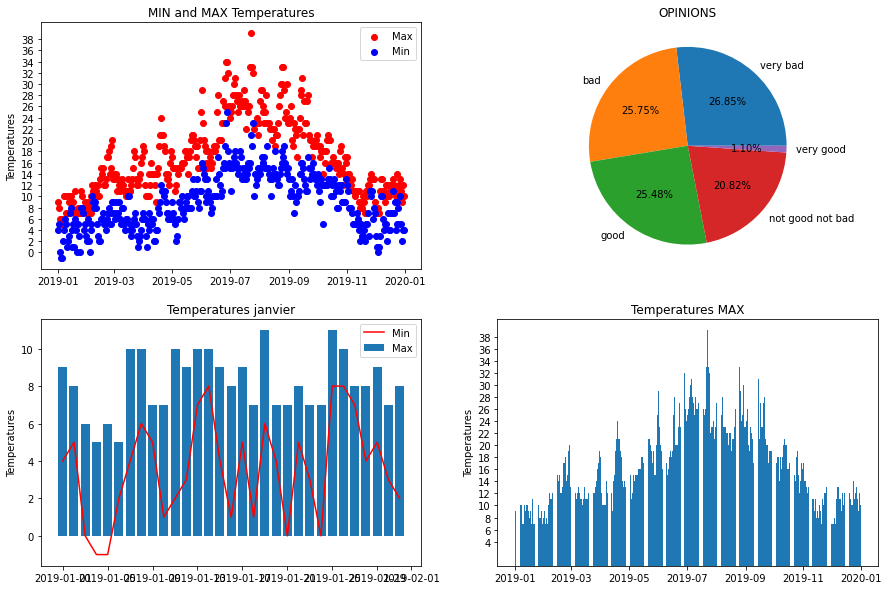

In [ ]:
# Complete the code below :
df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?

# Graph upper left
fig, ax = plt.subplots(figsize = (15,10)) 
graph_1 = plt.subplot(221) 
plt.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red', label = 'Max')
plt.scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue', label = 'Min')
plt.legend(loc = 'upper right')
plt.title('MIN and MAX Temperatures')
plt.ylabel('Temperatures')
graph_1.yaxis.set_ticks(range(0,40,2))


graph_2 = plt.subplot(222)

df_opinion = df_weather['OPINION'].value_counts()
df_opinion.plot.pie(autopct='%1.2f%%',label = '') 
plt.title('OPINIONS')

graph_3 = plt.subplot(223)
y = df_weather.iloc[0:31,1] 
x = df_weather.iloc[0:31,0]
plt.bar(x, y, label = 'Max')
y = df_weather.iloc[0:31,2]
x = df_weather.iloc[0:31,0]
plt.plot(x, y, label = 'Min', color = 'red')
plt.title('Temperatures janvier')
plt.ylabel('Temperatures')
plt.legend(loc = 'upper right')

graph_4 = plt.subplot(224)

y = df_weather.iloc[:,1]
x = df_weather.iloc[:,0]
plt.bar(x,y)
plt.title('Temperatures MAX')
plt.ylabel('Temperatures')
graph_4.yaxis.set_ticks(range(4,40,2))

plt.show()

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : index can help you to sort the date correctly

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

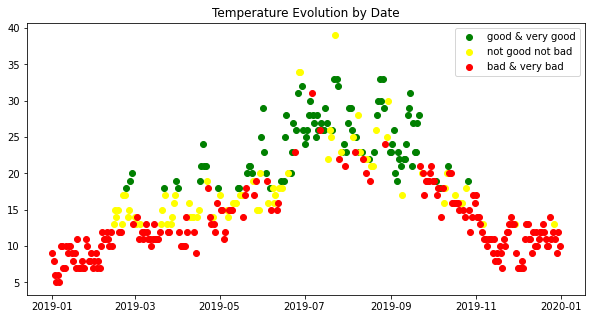

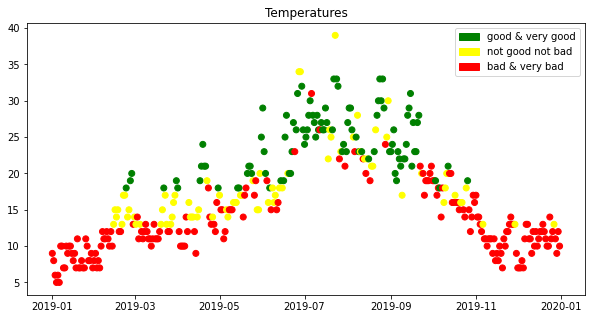

In [ ]:
# It's your turn now :
fig, ax = plt.subplots(figsize = (10,5))
colors = {'very good':'green', 'good':'green', 'not good not bad':'yellow', 'bad':'red', 'very bad':'red'}

plt.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c=df_weather['OPINION'].apply(lambda x: colors[x])) # function lambda à voir 

color_1 = mpatches.Patch(color='green', label='good & very good')
color_2 = mpatches.Patch(color='yellow', label='not good not bad')
color_3 = mpatches.Patch(color='red', label='bad & very bad')
plt.legend(loc = 'upper right', handles = [color_1, color_2,color_3])

plt.title('Temperatures')
plt.show()

